Importing Libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection

In [89]:
# Loading Data from csv file to a Pandas Dataframe
calories = pd.read_csv('calories.csv')

In [90]:
# Print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [91]:
exercise = pd.read_csv("exercise.csv")

In [92]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining both Dataframes

In [93]:
calories_data = pd.concat([exercise,calories['Calories']],axis=1)

In [94]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [95]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [96]:
# getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [97]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [98]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

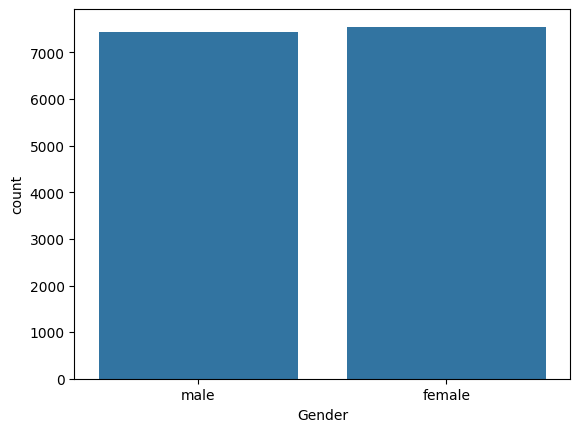

In [99]:
# Plotting the gender column in count plot
sns.countplot(x=calories_data['Gender'])

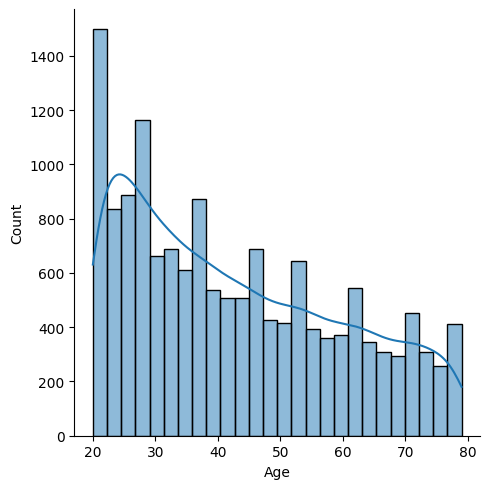

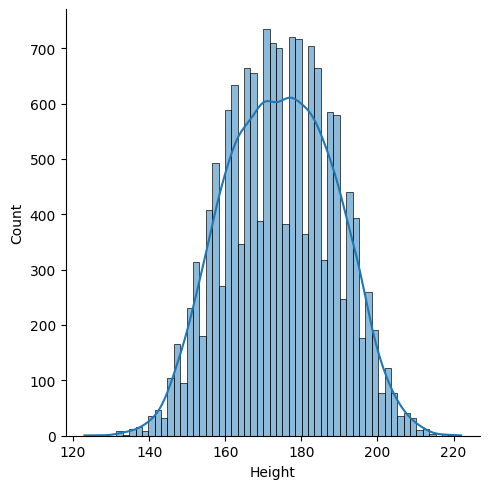

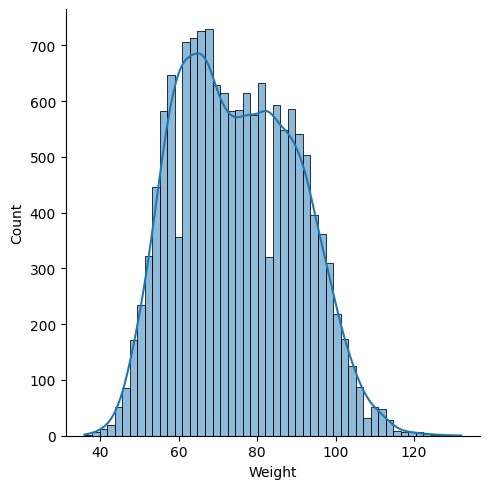

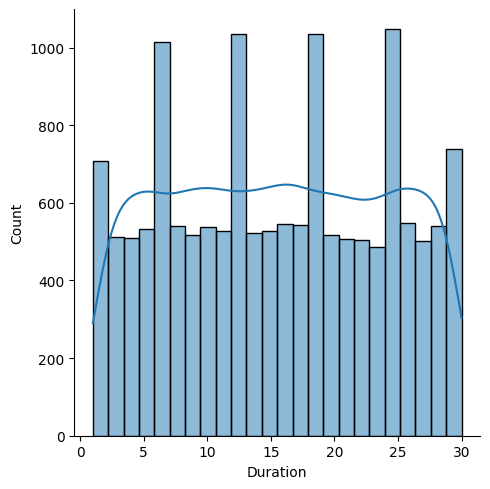

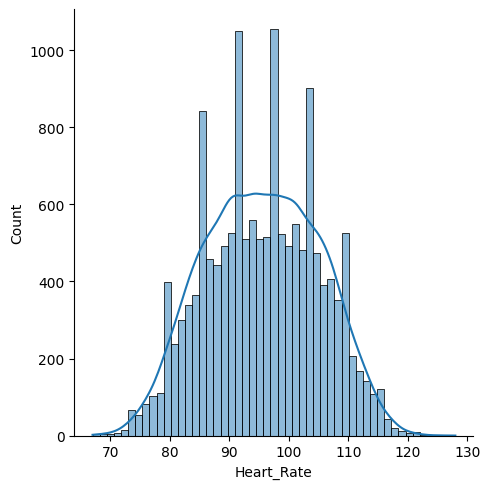

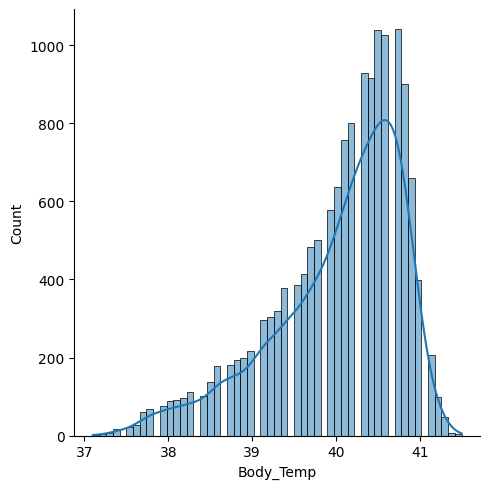

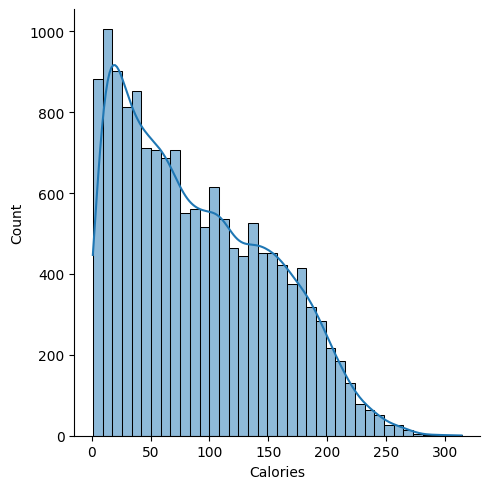

In [100]:
# finding the distrubution plot of 'Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories' columns
# (Either use displot or histplot)
sns.displot(calories_data['Age'], kde=True)
sns.displot(calories_data['Height'], kde=True)
sns.displot(calories_data['Weight'], kde=True)
sns.displot(calories_data['Duration'], kde=True)
sns.displot(calories_data['Heart_Rate'], kde=True)
sns.displot(calories_data['Body_Temp'], kde=True)
sns.displot(calories_data['Calories'], kde=True)

Converting the text data into numerical values

In [101]:
calories_data.replace({'Gender':{'male':0, 'female':1}}, inplace=True)
# calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})


C:\Users\DELL\AppData\Local\Temp\ipykernel_16836\3752019252.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0, 'female':1}}, inplace=True)


In [102]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Correlation in the Dataset

1. Postive Correlation
2. Negative Correlation

In [103]:
correlation = calories_data.corr()

<Axes: >

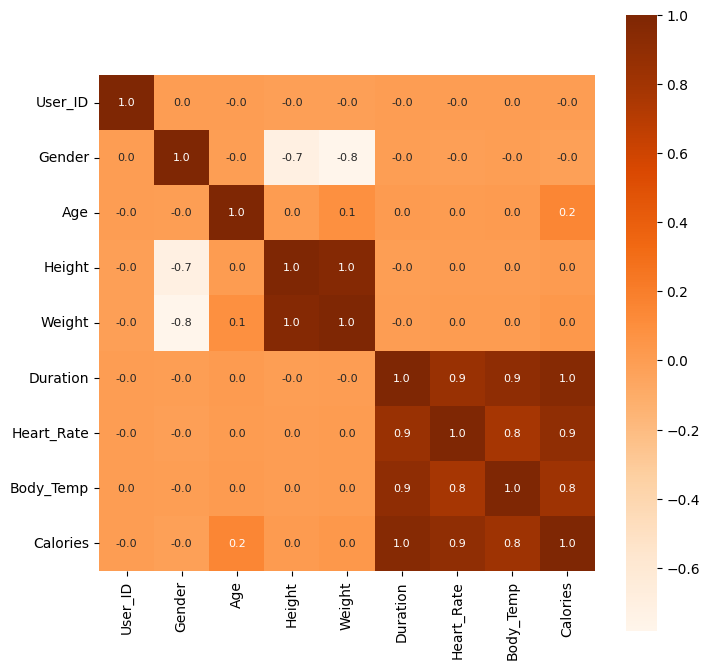

In [104]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')

Separating features and Target

In [105]:
X = calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y = calories_data['Calories']

In [106]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [107]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the Data into Training data and Test data

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [109]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Selection & Training

In [110]:
# loading the XGBoost Regressor model
model = XGBRegressor()

In [111]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [112]:
test_data_prediction = model.predict(X_test)

In [29]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Finding the R2 Score

In [117]:
from sklearn.metrics import r2_score
r2_score(Y_test,test_data_prediction)

0.998800624504713

Finding the Mean Absolute Error

In [118]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [119]:
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  1.4833678883314132


Pickling

In [120]:
# Converting the python object into byte stream
import pickle
with open('xgboost_model.pkl','wb') as file:
          pickle.dump(model, file)

In [121]:
# getting X_train data to csv file
X_train.to_csv 

<bound method NDFrame.to_csv of        Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1154        1   38   169.0    67.0       3.0        85.0       38.5
9804        0   30   194.0    96.0       9.0        91.0       39.6
7919        1   78   182.0    79.0       7.0        84.0       39.4
4854        0   50   171.0    77.0      29.0       111.0       40.8
5947        1   32   172.0    66.0      29.0       105.0       40.8
...       ...  ...     ...     ...       ...         ...        ...
11798       1   49   178.0    71.0      12.0        98.0       39.9
13896       1   67   159.0    58.0      23.0       101.0       40.4
6637        1   25   167.0    64.0      20.0       100.0       40.4
2575        1   36   167.0    64.0      28.0       108.0       40.8
7336        0   30   187.0    88.0      10.0        94.0       40.2

[12000 rows x 7 columns]>